## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [21]:
df = pd.read_csv("./QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [26]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    504
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2547  2023-11-01 00:00:00     php   1578
2548  2023-11-01 00:00:00  python   9170
2549  2023-11-01 00:00:00       r   2058
2550  2023-11-01 00:00:00    ruby    164
2551  2023-11-01 00:00:00   swift    910


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2552 non-null   object
 1   TAG     2552 non-null   object
 2   POSTS   2552 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 59.9+ KB


**Challenge**: Count the number of entries in each column of the dataframe

In [30]:
df.count()

DATE     2552
TAG      2552
POSTS    2552
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [29]:
df[["TAG","POSTS"]].groupby("TAG").sum().sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2516197
python,2170991
java,1909821
c#,1606638
php,1461620
c++,801620
r,500148
c,401053
swift,331156


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [33]:
df[["TAG", "DATE"]].groupby("TAG").count()

,DATE
TAG,
assembly,184
c,184
c#,185
c++,184
delphi,184
go,169
java,184
javascript,184
perl,184


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [35]:
df.DATE = pd.to_datetime(df.DATE)

In [36]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


In [38]:
type(df.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [39]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [42]:
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2008-07-01 to 2023-11-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    184 non-null    float64
 1   c           184 non-null    float64
 2   c#          185 non-null    float64
 3   c++         184 non-null    float64
 4   delphi      184 non-null    float64
 5   go          169 non-null    float64
 6   java        184 non-null    float64
 7   javascript  184 non-null    float64
 8   perl        184 non-null    float64
 9   php         184 non-null    float64
 10  python      184 non-null    float64
 11  r           182 non-null    float64
 12  ruby        184 non-null    float64
 13  swift       176 non-null    float64
dtypes: float64(14)
memory usage: 21.7 KB


In [43]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [44]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [47]:
reshaped_df.count()

TAG
assembly      184
c             184
c#            185
c++           184
delphi        184
go            169
java          184
javascript    184
perl          184
php           184
python        184
r             182
ruby          184
swift         176
dtype: int64

In [48]:
reshaped_df.fillna(0, inplace=True)

In [50]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

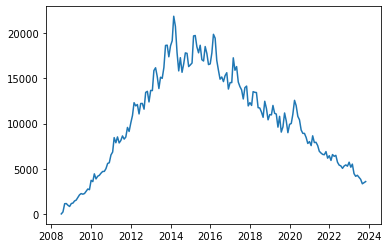

In [53]:
plt.plot(reshaped_df.java)

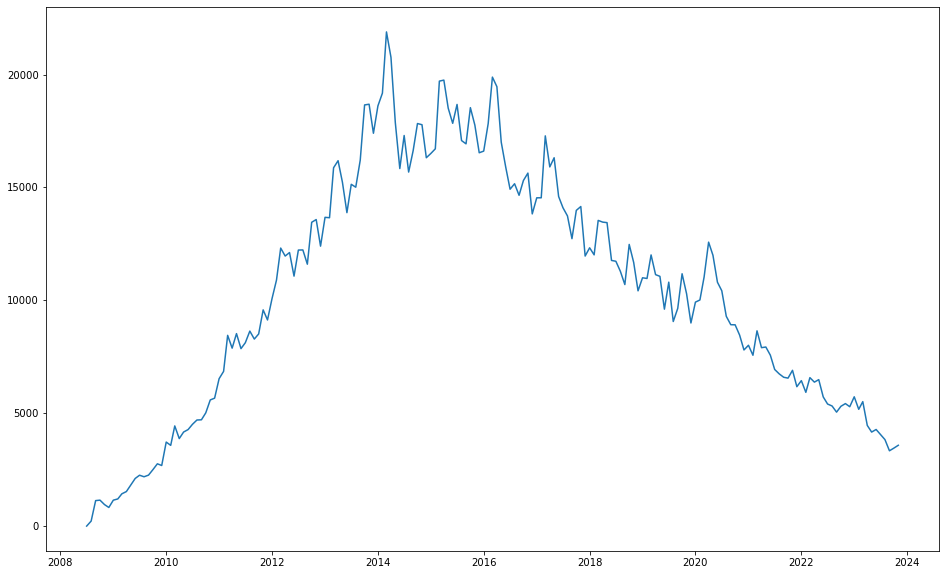

In [55]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

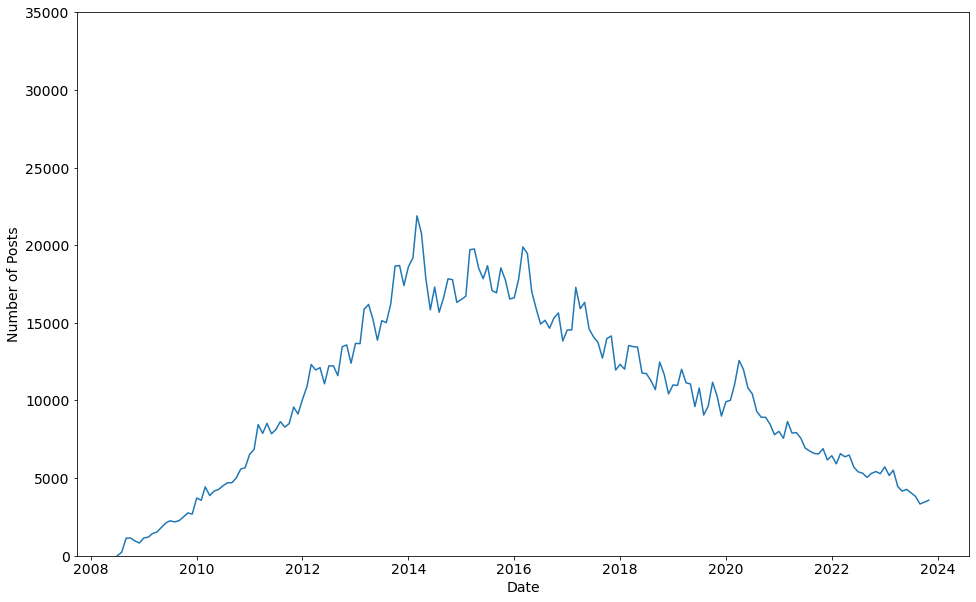

In [60]:
plt.figure(figsize=(16,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

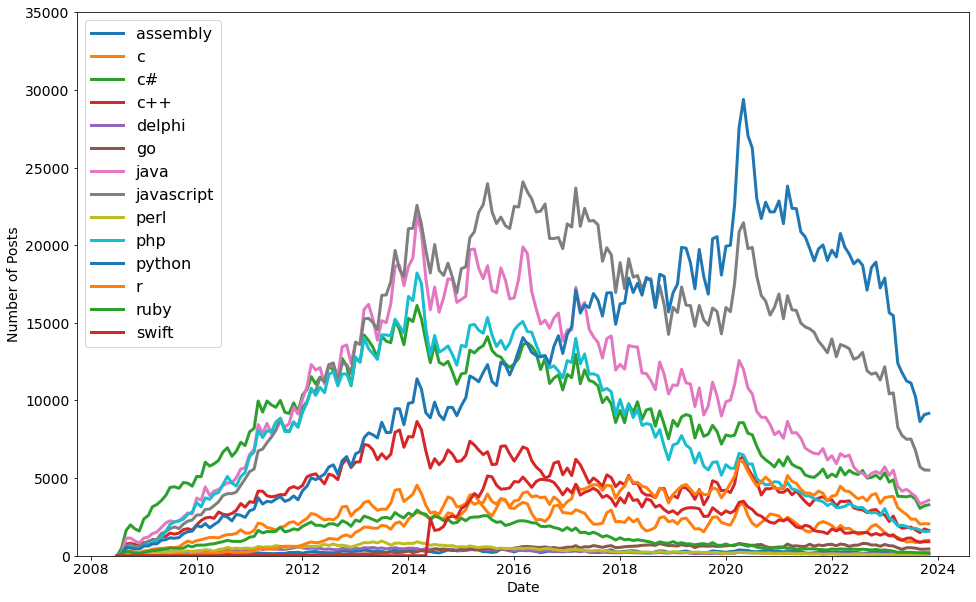

In [67]:
plt.figure(figsize=(16,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [76]:
roll_df = reshaped_df.rolling(window=6).mean()

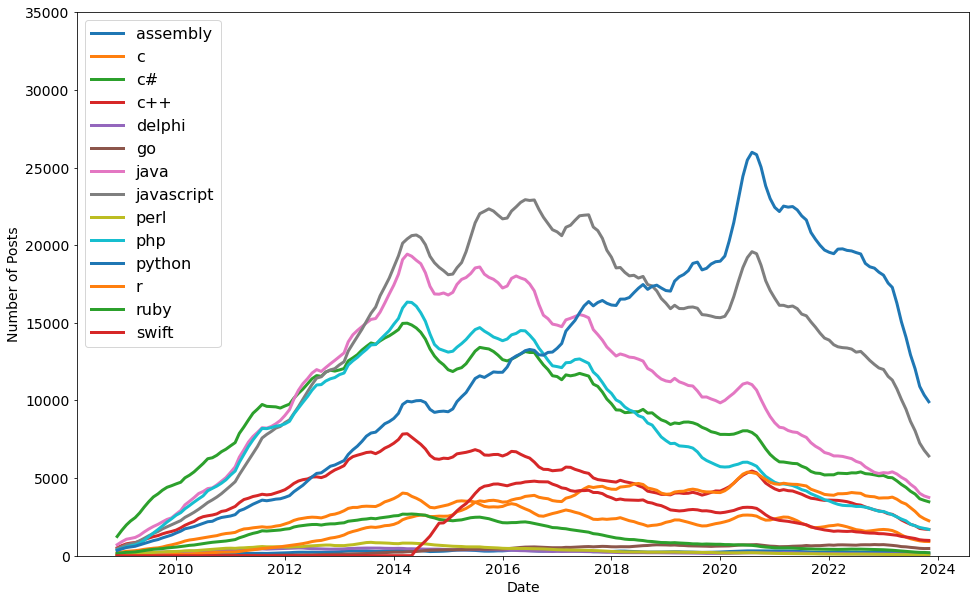

In [77]:
plt.figure(figsize=(16,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)